___
# Ciência dos Dados - PROJETO 1

## Pedro Furquim de Campos Suarez
___

## Estudo da comunicação por telefone ao longo do anos

___
## Introdução

Esse trabalho estuda como foi a expansão dos aparelhos telefonicos, mais especificamente dos aparelhos celulares e os fixos ao longo dos anos,além da influência da renda das pessoas nesse aumento. 
O mercado dos telefones móveis teve um grande avanço no começo da década de 2010 e isso teve um impacto tanto no número de celulares quanto no de telefones fixos.

___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Pedro Suarez\Documents\2 semestre\Ciências dos dados\Projeto 1


In [4]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

def fxrenda(linha):
    if linha>0 and linha<=1000:
        return "0 a 1000"
    if linha>1000 and linha<=2000:
        return "1000 a 2000"
    if linha>2000 and linha<=3000:
        return "2000 a 3000"
    if linha>3000 and linha<=4000:
        return "3000 a 4000"
    if linha>4000 and linha<=5000:
        return "4000 a 5000"
    if linha>5000 and linha<=6000:
        return "5000 a 6000"

In [5]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

tabela2015=pd.DataFrame({
    'Telefone_celular':dados2015.V0220,
    'Telefone_fixo':dados2015.V2020,
    'Renda_domiciliar_mensal_per_capita':dados2015.V4621,
    'Estado':dados2015.UF
    })

tabela2015.Telefone_celular = tabela2015.Telefone_celular.astype('category')
tabela2015.Telefone_celular.cat.categories = ('Sim', 'Não')

tabela2015.Telefone_fixo = tabela2015.Telefone_fixo.astype('category')
tabela2015.Telefone_fixo.cat.categories = ('Sim', 'Não')

a=tabela2015[(tabela2015.Renda_domiciliar_mensal_per_capita<6000)].dropna()
a.Renda_domiciliar_mensal_per_capita=a.Renda_domiciliar_mensal_per_capita.apply(fxrenda)
a=a[(a.Estado>=31) & (a.Estado<=35)] # Sudeste
a=a.dropna()

In [6]:
dados2014=pd.read_csv('DOM2014.csv',sep=',')

tabela2014=pd.DataFrame({
    'Telefone_celular':dados2014.V0220,
    'Telefone_fixo':dados2014.V2020,
    'Renda_domiciliar_mensal_per_capita': dados2014.V4621,
    'Estado':dados2014.UF
    })

tabela2014.Telefone_celular = tabela2014.Telefone_celular.astype('category')
tabela2014.Telefone_celular.cat.categories = ('Sim', 'Não')

tabela2014.Telefone_fixo = tabela2014.Telefone_fixo.astype('category')
tabela2014.Telefone_fixo.cat.categories = ('Sim', 'Não')

b=tabela2014[(tabela2014.Renda_domiciliar_mensal_per_capita<6000)].dropna()
b.Renda_domiciliar_mensal_per_capita=b.Renda_domiciliar_mensal_per_capita.apply(fxrenda)
b=b[(b.Estado>=31) & (b.Estado<=35)] # Sudeste
b=b.dropna()

In [7]:
dados2009=pd.read_csv('DOM2009.csv',sep=',')

tabela2009=pd.DataFrame({
    'Telefone_celular':dados2009.V0220,
    'Telefone_fixo':dados2009.V2020,
    'Renda_domiciliar_mensal_per_capita': dados2009.V4621,
    'Estado':dados2009.UF
    })

tabela2009.Telefone_celular = tabela2009.Telefone_celular.astype('category')
tabela2009.Telefone_celular.cat.categories = ('Sim', 'Não')

tabela2009.Telefone_fixo = tabela2009.Telefone_fixo.astype('category')
tabela2009.Telefone_fixo.cat.categories = ('Sim', 'Não')

c=tabela2009[(tabela2009.Renda_domiciliar_mensal_per_capita<6000)].dropna()
c.Renda_domiciliar_mensal_per_capita=c.Renda_domiciliar_mensal_per_capita.apply(fxrenda)
c=c[(c.Estado>=31) & (c.Estado<=35)] # Sudeste
c=c.dropna()

Os dados estudados foram os dos anos de 2009, 2014 e 2015, para que fosse possível notar alguma mudança entre um passado mais distante e um mais próximo.

Foi constatado que uma grande parte da população tem uma renda entre 0 e 6000 reais mensais, portanto o estudo vai ser voltado para eles já que representa uma significativa maior parcela das pessoas.

Para não ter influência de fatores geográficos como a distância de grandes polos tecnológicos, o estudo foi focalizado para a região sudeste.

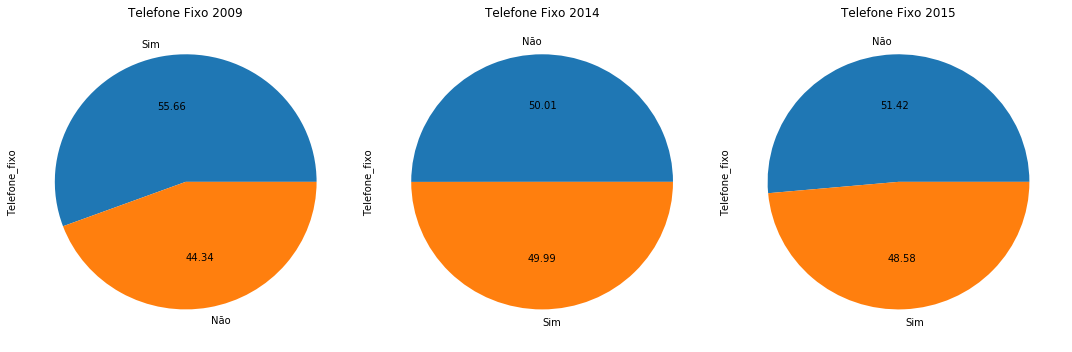

In [8]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
pizza14 = c.Telefone_fixo.value_counts()
pizza14.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Fixo 2009')

plt.subplot(132)
pizza12 = b.Telefone_fixo.value_counts()
pizza12.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Fixo 2014')

plt.subplot(133)
pizza1 = a.Telefone_fixo.value_counts()
pizza1.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Fixo 2015')

plt.tight_layout()
plt.show()

Os gráficos acima demonstram uma redução de 4,42 pontos percentuais, entre 2009 e 2014,dos usuários que possuem telefone fixo.

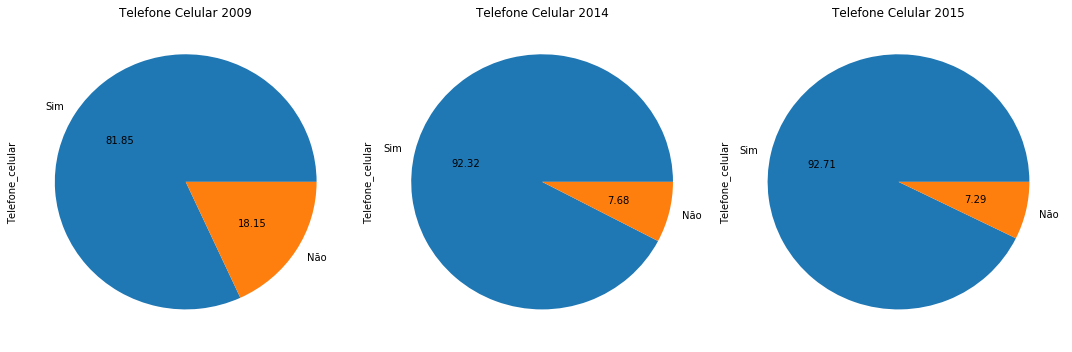

In [9]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
pizza24 = c.Telefone_celular.value_counts()
pizza24.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Celular 2009')

plt.subplot(132)
pizza22 = b.Telefone_celular.value_counts()
pizza22.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Celular 2014')

plt.subplot(133)
pizza2 = a.Telefone_celular.value_counts()
pizza2.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Telefone Celular 2015')

plt.tight_layout()
plt.show()

Um aumento mais impactante foi observado nos usuários de telefone celular, entre 2009 e 2014, houve um aumento de 10,86 pontos percentuais.

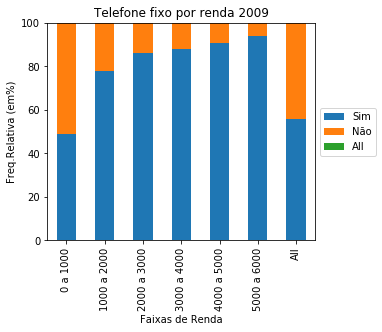

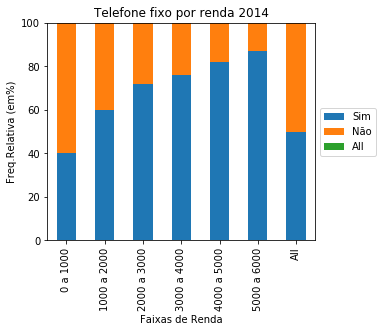

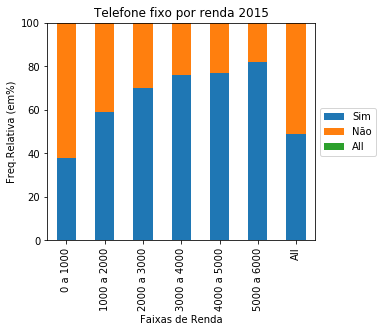

In [13]:
ct=pd.crosstab(a.Telefone_fixo,a.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Fixo 2015'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct = ct.iloc[0:5,:]

ct12=pd.crosstab(b.Telefone_fixo,b.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Fixo 2014'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct12 = ct12.iloc[0:5,:]

ct13=pd.crosstab(c.Telefone_fixo,c.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Fixo 2009'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct13 = ct13.iloc[0:5,:]

plot13 = ct13.T.plot(kind='bar', stacked=True,title='Telefone fixo por renda 2009')
plot13.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot12 = ct12.T.plot(kind='bar', stacked=True,title='Telefone fixo por renda 2014')
plot12.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot = ct.T.plot(kind='bar', stacked=True,title='Telefone fixo por renda 2015')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Analisando os três gráficos é possível perceber que houve uma queda nos usuários como ja havia sido notada nos gráficos anteriores. Entretanto nesses gráficos fica evidente que a renda não tem participação nessa queda, isso porquê a redução é bem próxima entre todos as faixas de rendas.

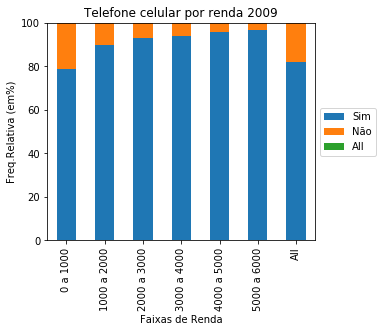

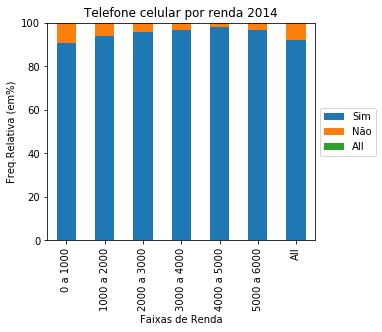

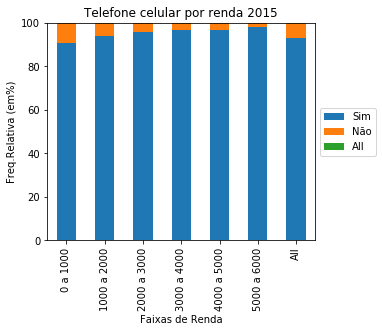

In [11]:
ct2=pd.crosstab(a.Telefone_celular,a.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Celular 2015'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:5,:]

ct22=pd.crosstab(b.Telefone_celular,b.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Celular 2014'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct22 = ct22.iloc[0:5,:]

ct23=pd.crosstab(c.Telefone_celular,c.Renda_domiciliar_mensal_per_capita,margins=True,rownames=['Telefone Celular 2009'], colnames=['Faixas de Renda']).apply(percConvert, axis=0)
ct23 = ct23.iloc[0:5,:]

plot23 = ct23.T.plot(kind='bar', stacked=True,title='Telefone celular por renda 2009')
plot23.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot22 = ct22.T.plot(kind='bar', stacked=True,title='Telefone celular por renda 2014')
plot22.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot2 = ct2.T.plot(kind='bar', stacked=True,title='Telefone celular por renda 2015')
plot2.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Os gráficos acima mostram um aumento geral entre as faixas de renda, porém foi nas baixas (entre 0 e 3000 reais) que houve um aumento percentual maior. 

___
## Conclusão 

O trabalho resultou em um, já esperado, aumento do número de celulares e uma redução dos fixos. Quanto a relevância da renda nesses casos, ela teve um impacto inverso do esperado nos aparelhos móveis, pois os que possuem uma menor renda obtiveram um maior crescimento proporcional. No caso dos fixos, ela não teve um impacto expressivo já que houve uma queda semelhante em todas as faixas. 